In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
##Please modify the path for reading the file##
df = pd.read_csv('/content/drive/My Drive/Meng/MIE1624/clean_kaggle_data.csv')

## **1.Exploratory Data Analysis(EDA)**



Characteristics of the dataset:
1. The dataset has 12497 rows and 247 columns
2. The dataset has the size of approximately 23.6 MB
3. Data types contain integers, strings and NaN. Some may need modification/encoding during analysis
4. Age: The survey contain the most age group is:25-29, followed by 30-39.
5. Gender: More than 80% who took the survey are male
6. Country:The top three countries are India, USA, Brazil
7. Education: Over 40% of the people who took the survey have a master's degree as their highest level of education, followed by around 30% of Bachelor's degree
8. Professional experience: The top 3 professional experiences are Data Scientist, Software Engineer and Data Analyst
9. Salary: Ranging from $1000 to $500,000 USD, with a median value of $50,000

In [ ]:
#Taking a look at the dataset.
df.head(3)

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_OTHER_TEXT,Q10,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_Part_6,Q12_Part_7,Q12_Part_8,Q12_Part_9,Q12_Part_10,Q12_Part_11,Q12_Part_12,Q12_OTHER_TEXT,Q13_Part_1,Q13_Part_2,Q13_Part_3,Q13_Part_4,...,Q31_OTHER_TEXT,Q32_Part_1,Q32_Part_2,Q32_Part_3,Q32_Part_4,Q32_Part_5,Q32_Part_6,Q32_Part_7,Q32_Part_8,Q32_Part_9,Q32_Part_10,Q32_Part_11,Q32_Part_12,Q32_OTHER_TEXT,Q33_Part_1,Q33_Part_2,Q33_Part_3,Q33_Part_4,Q33_Part_5,Q33_Part_6,Q33_Part_7,Q33_Part_8,Q33_Part_9,Q33_Part_10,Q33_Part_11,Q33_Part_12,Q33_OTHER_TEXT,Q34_Part_1,Q34_Part_2,Q34_Part_3,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,40000,$0 (USD),Twitter (data science influencers),NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,NaN,NaN,NaN,NaN,-1,7500,"> $100,000 ($USD)",NaN,NaN,NaN,"Kaggle (forums, blog, social media, etc)",NaN,"YouTube (Cloud AI Adventures, Siraj Raval, etc)","Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",NaN,NaN,NaN,NaN,-1,NaN,Coursera,NaN,DataCamp,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,3,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,I do not know,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,300000,"$10,000-$99,999",NaN,NaN,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, Linear Digre...","Blogs (Towards Data Science, Medium, Analytics...",Journal Publications (traditional publications...,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,-1,NaN,Coursera,edX,DataCamp,...,-1,NaN,NaN,Azure Machine Learning Studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [ ]:
print('Shape of dataset:',df.shape)
print(df.info())


Shape of dataset: (12497, 247)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Columns: 247 entries, Unnamed: 0 to Q34_OTHER_TEXT
dtypes: int64(31), object(216)
memory usage: 23.6+ MB
None


In [ ]:
#Consider Gender, Country, Age, Education, Professional Experience, and Salary. Create a new df consisting of these features
df1 = df[['Q1','Q2','Q3','Q4','Q5','Q10']]
df1 = df1.rename(columns = {'Q1':'age','Q2':'gender','Q3':'country','Q4':'education','Q5':'professional experience','Q10':'Salary'})
df1.head()

,age,gender,country,education,professional experience,Salary
0,22-24,Male,France,Master’s degree,Software Engineer,40000
1,40-44,Male,India,Professional degree,Software Engineer,7500
2,40-44,Male,Australia,Master’s degree,Other,300000
3,22-24,Male,India,Bachelor’s degree,Other,5000
4,50-54,Male,France,Master’s degree,Data Scientist,70000


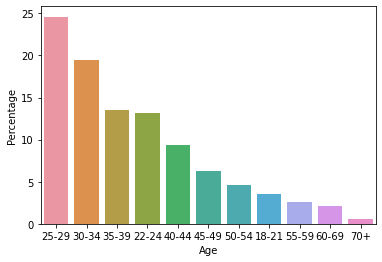

In [ ]:
#Use bar plot to find out percentage distributions in Country, Age, Education, Professional Experience, and Salary
age = df1['age'].value_counts(normalize=True)  #count the percentage of occurance in the dateset for each category
age = pd.DataFrame(age) # transform into dataframe  
age.reset_index(level=0, inplace=True)  #Convert the age groups values from index to actualy data
age.columns = ['Age','Percentage'] #name the columns in the dataframe
age_plot = sns.barplot(x=age['Age'], y=age['Percentage']*100, data=age) #use barplot

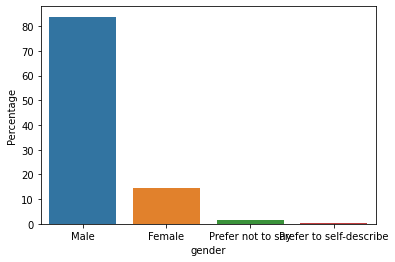

In [ ]:
gender = df1['gender'].value_counts(normalize=True)
gender = pd.DataFrame(gender)
gender.reset_index(level=0, inplace=True)
gender.columns = ['gender','Percentage']
gender_plot = sns.barplot(x=gender['gender'], y=gender['Percentage']*100, data=gender)

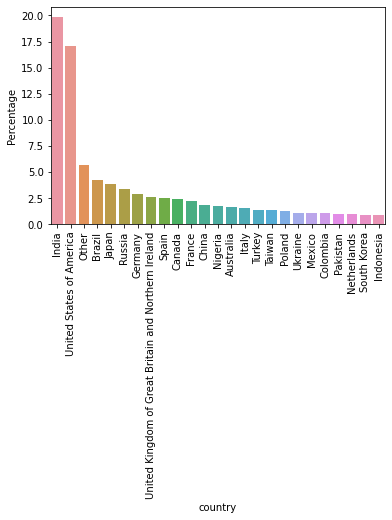

In [ ]:
country = df1['country'].value_counts(normalize=True).head(25) #The list is too long, so only keep the top 25 countries
country = pd.DataFrame(country)
country.reset_index(level=0, inplace=True)
country.columns = ['country','Percentage']
country_plot = sns.barplot(x=country['country'], y=country['Percentage']*100, data=country,orient='v',dodge=False)
for item in country_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

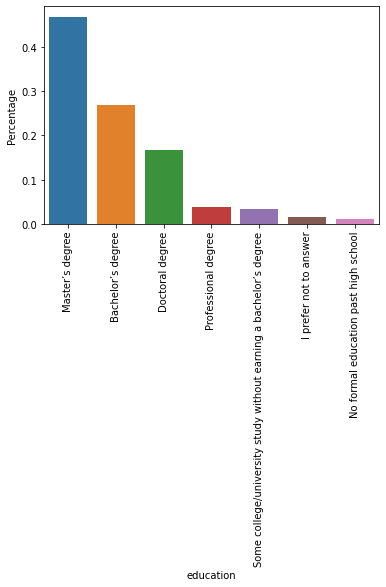

In [ ]:
education = df1['education'].value_counts(normalize=True)
education = pd.DataFrame(education)
education.reset_index(level=0, inplace=True)
education.columns = ['education','Percentage']
education_plot = sns.barplot(x=education['education'], y=education['Percentage'], data=education)
for item in education_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

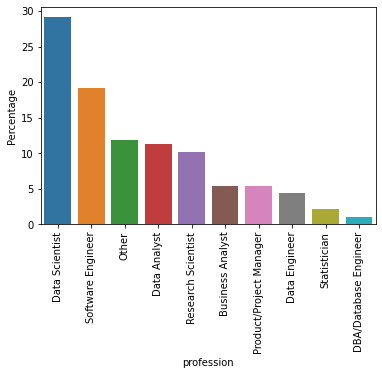

In [ ]:
profession = df1['professional experience'].value_counts(normalize=True)
profession = pd.DataFrame(profession)
profession.reset_index(level=0, inplace=True)
profession.columns = ['profession','Percentage']
profession_plot = sns.barplot(x=profession['profession'], y=profession['Percentage']*100, data=profession)
for item in profession_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

median salary: 50000.0


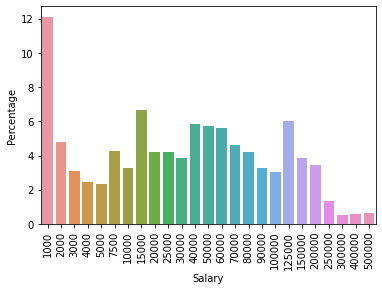

In [ ]:
Salary = df1['Salary'].value_counts(normalize=True,)
Salary = pd.DataFrame(Salary)
Salary.reset_index(level=0, inplace=True)
Salary.columns = ['Salary','Percentage']
Salary_plot = sns.barplot(x=Salary['Salary'], y=Salary['Percentage']*100, data=Salary)
for item in Salary_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)
print('median salary:',Salary['Salary'].median())

**Discover 3 trends: Age, Education, Profession vs salary**

1. **Trend Age vs Salary**: The older the person is, the more income he/she makes
2. **Trend Education vs Salary**: In general, higher education causes higher income
3. **Trend Profession vs Salary**: Management levels make the most income, followed by Data Scientists. Data Analysts have the lowest mean salary


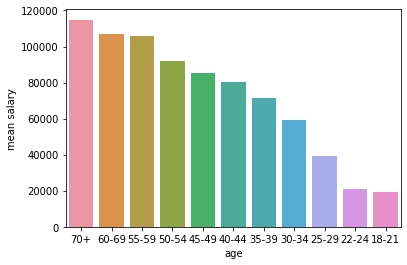

In [ ]:
#Age vs Salary
age_unique = df1['age'].unique() #find unique values in the column
y = []
for i in age_unique:              #a loop for calculating the mean salary values for each group
  dfs = df1.loc[df1['age'] == i]
  y.append(dfs['Salary'].mean())
df_age = pd.DataFrame(
    {'age': age_unique,
     'mean salary': y,
    })
df_age.sort_values(by='mean salary',ascending=False, inplace=True) #sort in descending order and plot
age_salary_plot = sns.barplot(x=df_age['age'], y=df_age['mean salary'],data=df_age)

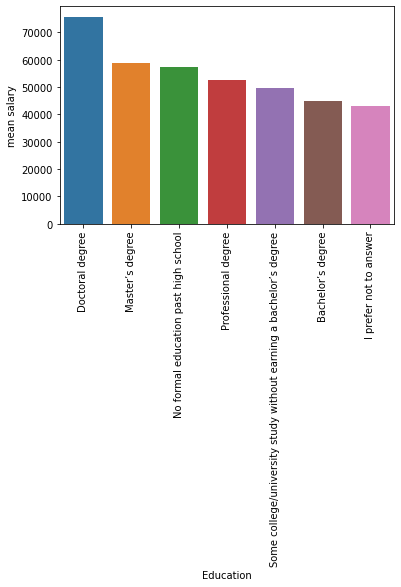

In [ ]:
#Education vs Salary
Education_unique = df1['education'].unique() #find unique values in the column
y = []
for i in Education_unique:              #a loop for calculating the mean salary values for each group
  dfs = df1.loc[df1['education'] == i]
  y.append(dfs['Salary'].mean())
df_Education = pd.DataFrame(
    {'Education': Education_unique,
     'mean salary': y,
    })
df_Education.sort_values(by='mean salary',ascending=False, inplace=True) #sort in descending order and plot
Education_salary_plot = sns.barplot(x=df_Education['Education'], y=df_Education['mean salary'],data=df_Education)
for item in Education_salary_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

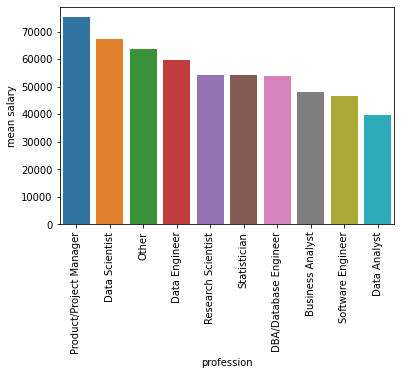

In [ ]:
#profession vs Salary
profession_unique = df1['professional experience'].unique() #find unique values in the column
y = []
for i in profession_unique:              #a loop for calculating the mean salary values for each group
  dfs = df1.loc[df1['professional experience'] == i]
  y.append(dfs['Salary'].mean())
df_profession = pd.DataFrame(
    {'profession': profession_unique,
     'mean salary': y,
    })
df_profession.sort_values(by='mean salary',ascending=False, inplace=True) #sort in descending order and plot
profession_salary_plot = sns.barplot(x=df_profession['profession'], y=df_profession['mean salary'],data=df_profession)
for item in profession_salary_plot.get_xticklabels(): #rotate the x labels by 90 degrees to avoid text overlapping
    item.set_rotation(90)

## **2. Estimating the difference between average salary (Q10) of males vs. females.**

In [ ]:
#Compute and report descriptive statistics for each group (remove missing data, ifnecessary).
#mean salary for male is 58709.586556 and female is 45933.771210
#Other statistics are shown in the output
df2 = df[['Q2','Q10']]
df2 = df2.rename(columns = {'Q2':'gender','Q10':'Salary'})
dfs_male= df2.loc[df2['gender'] == 'Male']
print('Male\n',dfs_male['Salary'].describe())
dfs_female= df2.loc[df2['gender'] == 'Female']
print('Female\n',dfs_female['Salary'].describe())

Male
 count     10473.000000
mean      58709.586556
std       74920.620048
min        1000.000000
25%        7500.000000
50%       30000.000000
75%       80000.000000
max      500000.000000
Name: Salary, dtype: float64
Female
 count      1827.000000
mean      45933.771210
std       60253.789591
min        1000.000000
25%        3000.000000
50%       20000.000000
75%       70000.000000
max      500000.000000
Name: Salary, dtype: float64


In [ ]:
#If suitable, perform a two-sample t-test with 0.05 threshold. Explain your rationale.
#First, apply two-sample t-test directly on the dataset. 
#p value of 5.108938811599026e-12 indicates that there's nearly 0% probability that the test happened by chance
#t value of 6.909 indicates that the two groups are 6.909 times as different from each other as they are within each other
#indicating that there is an significance which suggests that salaries are affected by gender.
from scipy import stats
t, p = stats.ttest_ind(dfs_male['Salary'], dfs_female['Salary'])
print('t value:{}\np value:{}'.format(t,p))

t value:6.909347703471073
p value:5.108938811599026e-12


In [ ]:
#Bootstrap your data for comparing the mean of salary (Q10) for the two groups.
#Note that the number of instances you sample from each group should be relative to its
#size. Use 1000 replications. Plot two bootstrapped distributions (for males and females)
#and the distribution of the difference in means.

#It can be observed that the two histograms for male and female are both likely normally distributed.
#The mean salary with highest frequency for male is still higher than female

Text(0.5, 0, 'Mean Salary for male')

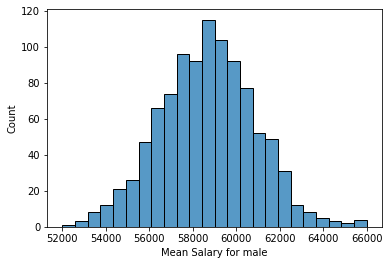

In [ ]:
occurance = []
diff = []
for i in range(1000):
  occurance.append(dfs_male['Salary'].sample(int(dfs_male.shape[0]*0.1)).mean()) #10% of data every replication
  diff.append(occurance[i]-dfs_male['Salary'].mean())
mean_diff = sum(diff) / len(diff)
sns.histplot(data=occurance)
plt.xlabel('Mean Salary for male')

Mean differences for male: -34.54548618264398


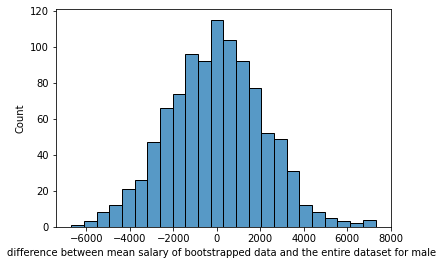

In [ ]:
sns.histplot(data=diff)
plt.xlabel('difference between mean salary of bootstrapped data and the entire dataset for male ')
print('Mean differences for male:',mean_diff )

Text(0.5, 0, 'Mean Salary for female')

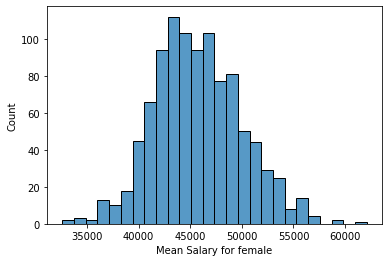

In [ ]:
occurance = []
diff = []
for i in range(1000):
  occurance.append(dfs_female['Salary'].sample(int(dfs_female.shape[0]*0.1)).mean()) #10% of data every replication
  diff.append(occurance[i]-dfs_female['Salary'].mean())
mean_diff = sum(diff) / len(diff)
sns.histplot(data=occurance)
plt.xlabel('Mean Salary for female')

Mean differences for female: -164.669561281628


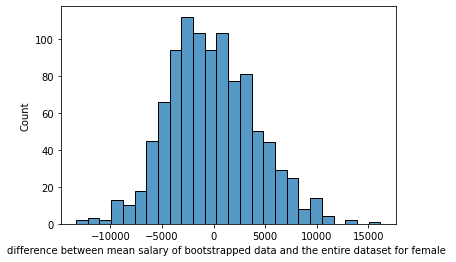

In [ ]:
sns.histplot(data=diff)
plt.xlabel('difference between mean salary of bootstrapped data and the entire dataset for female ')
print('Mean differences for female:',mean_diff )

In [ ]:
#If suitable, perform a two-sample t-test with 0.05 threshold on the bootstrapped data. Explain your rationale
#there are 10473 male data and only 1827 female data
#So randomly select 1000 male samples and 1000 female samples and perform t test again
#Although t values are smaller and p value is larger, the result still suggests the same as above.  
t, p = stats.ttest_ind(dfs_male['Salary'].sample(1000) , dfs_female['Salary'].sample(1000))
print('t value:{}\np value:{}'.format(t,p))

t value:3.8357338890694432
p value:0.0001290724227133369


In [ ]:
#Comment on your findings.
#Please see above comments for my findings and comments

## **3.Select “highest level of formal education” (Q4) from the dataset and repeat steps a to e, this time use analysis of variance (ANOVA)**

In [ ]:
df3 = df[['Q4','Q10']]
df3 = df3.rename(columns = {'Q4':'education','Q10':'Salary'})
dfs_b= df3.loc[df3['education'] == 'Bachelor’s degree']
print('Bachelor\n',dfs_b['Salary'].describe())
dfs_m= df3.loc[df3['education'] == 'Master’s degree']
print('Master\n',dfs_m['Salary'].describe())
dfs_d= df3.loc[df3['education'] == 'Doctoral degree']
print('Doctoral\n',dfs_d['Salary'].describe())


Bachelor
 count      3361.000000
mean      44999.256174
std       67923.680798
min        1000.000000
25%        3000.000000
50%       15000.000000
75%       60000.000000
max      500000.000000
Name: Salary, dtype: float64
Master
 count      5868.000000
mean      58778.629857
std       70265.728605
min        1000.000000
25%        7500.000000
50%       40000.000000
75%       80000.000000
max      500000.000000
Name: Salary, dtype: float64
Doctoral
 count      2083.000000
mean      75761.401824
std       83376.717093
min        1000.000000
25%       15000.000000
50%       60000.000000
75%      100000.000000
max      500000.000000
Name: Salary, dtype: float64


In [ ]:
#If suitable, perform a two-sample t-test with 0.05 threshold. Explain your rationale.
#First, apply one-way ANOVA directly on the dataset. 
#p value of 2.233668506153945e-51 indicates that there's nearly 0% probability that the test happened by chance
#f value of 117.83927746561439 indicates that the two groups are very different
#indicating that there is an significance which suggests that salaries are affected by education.
from scipy.stats import f_oneway
f, p = f_oneway(dfs_b['Salary'],dfs_m['Salary'],dfs_d['Salary'])
print('f statistic :{}\np value:{}'.format(f,p))

f statistic :117.83927746561439
p value:2.233668506153945e-51


In [ ]:
#It can be observed that the 3 histograms for Bachelor, master and doctoral degree are likely normally distributed.
#The mean salary with highest frequency for doctoral is highest, followed by master and bachelor

Mean differences for Bachelor Degree: 104.57269528981176


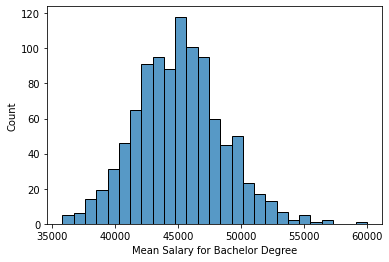

In [ ]:
occurance = []
diff = []
for i in range(1000):
  occurance.append(dfs_b['Salary'].sample(int(dfs_b.shape[0]*0.1)).mean()) #10% of data every replication
  diff.append(occurance[i]-dfs_b['Salary'].mean())
mean_diff = sum(diff) / len(diff)
sns.histplot(data=occurance)
plt.xlabel('Mean Salary for Bachelor Degree')
print('Mean differences for Bachelor Degree:',mean_diff)

Mean differences for Master Degree: 34.9614400776086


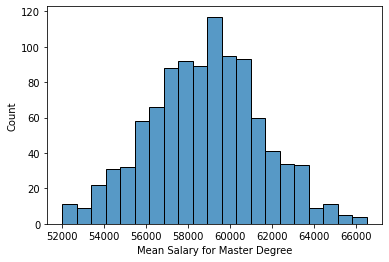

In [ ]:
occurance = []
diff = []
for i in range(1000):
  occurance.append(dfs_m['Salary'].sample(int(dfs_m.shape[0]*0.1)).mean()) #10% of data every replication
  diff.append(occurance[i]-dfs_m['Salary'].mean())
mean_diff = sum(diff) / len(diff)
sns.histplot(data=occurance)
plt.xlabel('Mean Salary for Master Degree')
print('Mean differences for Master Degree:',mean_diff)

Mean differences for Doctoral Degree: -133.33451659957507


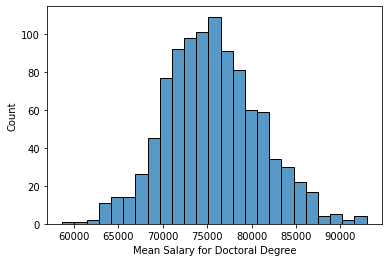

In [ ]:
occurance = []
diff = []
for i in range(1000):
  occurance.append(dfs_d['Salary'].sample(int(dfs_d.shape[0]*0.1)).mean()) #10% of data every replication
  diff.append(occurance[i]-dfs_d['Salary'].mean())
mean_diff = sum(diff) / len(diff)
sns.histplot(data=occurance)
plt.xlabel('Mean Salary for Doctoral Degree')
print('Mean differences for Doctoral Degree:',mean_diff)

In [ ]:
#Although f value is smaller and p value is larger, the result still suggests the same as above.  
#which is that there is a significance of difference between salaries between different degrees earned

f, p = f_oneway(dfs_b['Salary'].sample(int(dfs_b.shape[0]*0.1)),dfs_m['Salary'].sample(int(dfs_m.shape[0]*0.1)),dfs_d['Salary'].sample(int(dfs_d.shape[0]*0.1)))
print('f statistic :{}\np value:{}'.format(f,p))

f statistic :8.608928778262186
p value:0.00019474314135614634
